<a href="https://colab.research.google.com/github/YuliyaMilk/DB/blob/master/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install MulticoreTSNE 
#To make the computation log visible in jupyter we should install wurlitzer (pip install wurlitzer) and execute this line in any cell beforehand(%load_ext wurlitzer)
! pip install wurlitzer 
%load_ext wurlitzer
! pip install umap-learn 
#Dataget is an easy to use, framework-agnostic, dataset library that gives you quick access to a collection of Machine Learning datasets through a simple API.
! pip install dataget
! pip install --upgrade gensim

from matplotlib import pyplot
import numpy as np
import seaborn as sns
import dataget
import gensim.downloader as api
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist

from MulticoreTSNE import MulticoreTSNE
from sklearn.decomposition import PCA
from umap import UMAP

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=68518 sha256=52d241e68bb157eb45dfb09e93ca40d6b81d779056e39cdcad6995fade41d66a
  Stored in directory: /root/.cache/pip/wheels/80/47/df/c0d66e9f775f33281c422a1964de86a59c47f93bb8c37643e3
Successfully built MulticoreTSNE
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 27.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=70a1364ebac94f1ade098e856c02fbcbc544ea0657dae63ea34dffe38aea642f
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=d737e9dd4e503c1698d6424cce19daccb7ebeb7c938cb1bdd9ddcd998f3dbae5
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent

**Загрузка данных**

In [2]:
#COIL20
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
!mv COIL20.mat?raw=true coil20.mat 
from scipy import io
#Load and read .mat file
mat_contents = io.loadmat('coil20.mat')
coil20_x_test = mat_contents['X']
coil20_y_test = mat_contents['Y']
mat_contents

--2021-11-18 20:17:10--  https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
Resolving jundongl.github.io (jundongl.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jundongl.github.io (jundongl.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3024549 (2.9M) [application/octet-stream]
Saving to: ‘COIL20.mat?raw=true’

COIL20.mat?raw=true 100%[===================>]   2.88M  --.-KB/s    in 0.05s   

2021-11-18 20:17:10 (59.6 MB/s) - ‘COIL20.mat?raw=true’ saved [3024549/3024549]



{'X': array([[0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
         0.01568627],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
         0.01960784],
        [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
         0.01568627],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), 'Y': array([[ 1],
        [ 1],
        [ 1],
        ...,
        [20],
        [20],
        [20]], dtype=uint8), '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 17 16:06:33 2015', '__version__': '1.0'}

In [3]:
#MNIST
(x_train, y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Fashion MNIST
(X_train, Y_train), (fash_x_test, fash_y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**Алгоритмы**

In [5]:
tsne = MulticoreTSNE()
pca = PCA()
umap = UMAP()

algorithms = [umap, tsne, pca]

**Визуализация**

In [6]:
def visual_data (fig, title, x_transformed, target, ax):
  x_test = x_transformed[:, 0]
  y_test = x_transformed[:, 1]
  scatter = ax.scatter(x_test, y_test, c=target, cmap='Spectral', marker='.')
  ax.set_title(title)

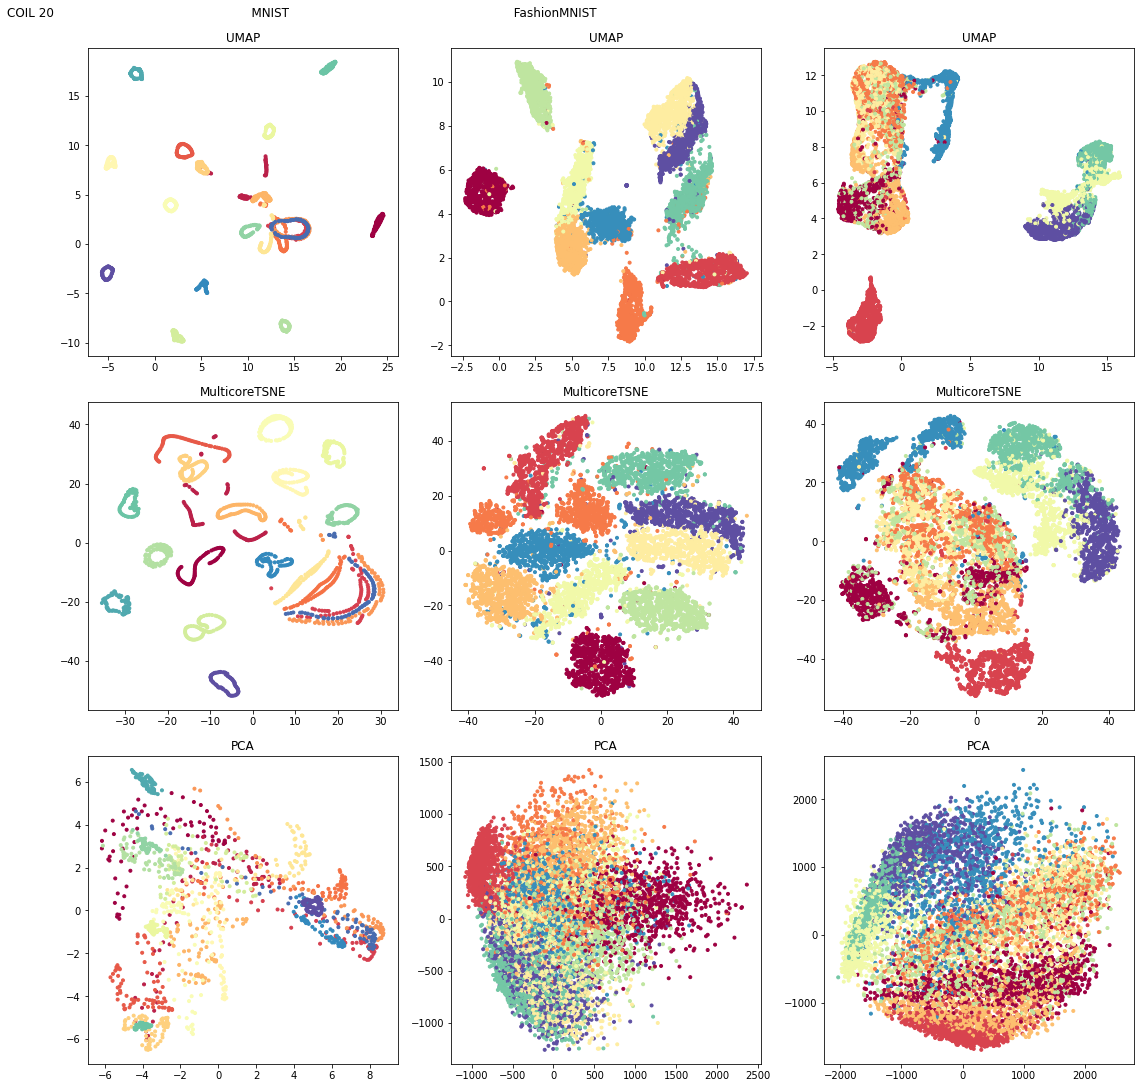

In [8]:
pyplot.rcParams["figure.figsize"] = (15,15)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = pyplot.subplots(3, 3, constrained_layout=True)
# COIL20
data, target, axes = coil20_x_test, coil20_y_test, [ax1, ax4, ax7]
for alg, ax in np.vstack([algorithms, axes]).T:
  x_transformed = alg.fit_transform(data)
  visual_data(fig, type(alg).__name__, x_transformed, target, ax)
  

# MNIST
nsamples, nx, ny = mnist_x_test.shape
mnist_d = mnist_x_test.reshape((nsamples,nx*ny))
data, target, axes = mnist_d,  mnist_y_test, [ax2, ax5, ax8]
for alg, ax in np.vstack([algorithms, axes]).T:
  x_transformed = alg.fit_transform(data)
  visual_data(fig, type(alg).__name__, x_transformed, target, ax)

# FASHION MNIST
nsamples, nx, ny = fash_x_test.shape
fashion_mnist = fash_x_test.reshape((nsamples,nx*ny))
data, target, axes = fashion_mnist, fash_y_test, [ax3, ax6, ax9]
for alg, ax in np.vstack([algorithms, axes]).T:
  x_transformed = alg.fit_transform(data)
  visual_data(fig, type(alg).__name__, x_transformed, target, ax)


fig.suptitle('COIL 20                                                   MNIST                                                          FashionMNIST', fontsize=12)
pyplot.show()

T-SNE и UMAP лучше справляются с сохранением локальной структуры данных, чем PCA, который лучше показывает себя в сохранении глобальной.
UMAP намного быстрее и более вычислительно эффективен, чем t-SNE, а также лучше справляется с задачей переноса глобальной структуры данных в новое, уменьшенное пространство.

При этом также, как и в статье, UMAP в принципе и глобальную структуру сохраняет, если сравнить с PCA на MNIST и FashionMNIST:


ОЗУ колаба не хватает на обработку всего датасета,поэтому загрузим только часть его((60000, 300)).

In [9]:
from MulticoreTSNE import MulticoreTSNE
from sklearn.decomposition import PCA
from umap import UMAP
import numpy as np
from matplotlib import pyplot
import gensim.downloader as api
from gensim.models import KeyedVectors

tsne = MulticoreTSNE()
pca = PCA()
umap = UMAP()

algs = [umap, tsne, pca]

In [10]:
!brew install wget

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"



/bin/bash: brew: command not found
--2021-11-18 20:24:13--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.193.176
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.193.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  31.0MB/s    in 46s     

2021-11-18 20:24:59 (34.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [12]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz',binary=True)
word_vectors=word_vectors.vectors

tcmalloc: large alloc 3600007168 bytes == 0x5635387be000 @  0x7fe35517f001 0x7fe34c5f254f 0x7fe34c642b58 0x7fe34c646b17 0x7fe34c6e5203 0x563418273544 0x563418273240 0x5634182e7627 0x5634182e19ee 0x56341827548c 0x5634182b6159 0x5634182b30a4 0x563418273d49 0x5634182e794f 0x5634182e19ee 0x563418274bda 0x5634182e3737 0x5634182e19ee 0x563418274bda 0x5634182e3737 0x5634182e19ee 0x5634182e16f3 0x5634182dfb60 0x563418273349 0x563418273240 0x5634182e6973 0x5634182e19ee 0x563418274bda 0x5634182e2c0d 0x5634182e19ee 0x563418274bda


In [13]:
googlenews_data = word_vectors[np.random.randint(word_vectors.shape[0], size=int(word_vectors.shape[0]/50)), :]
googlenews_data.shape

(60000, 300)

In [14]:
def visual_data(fig, title, x_transformed, ax):
  x_test = x_transformed[:, 0]
  y_test = x_transformed[:, 1]
  print(x_test)
  scatter = ax.scatter(x_test, y_test, alpha=0.3, marker='.')
  ax.set_title(title)

**GOOGLE NEWS**

**UMAP**

     |████████████████████████████████| 4.0 MB 12.1 MB/s 
[[ 4.1203465   3.1612995 ]
 [ 3.9222946   1.5301887 ]
 [ 1.5536793   1.3065172 ]
 ...
 [ 3.87633     1.7882624 ]
 [ 2.7640162   0.36676082]
 [-2.4291832   0.7155249 ]]
[ 4.1203465  3.9222946  1.5536793 ...  3.87633    2.7640162 -2.4291832]


<Figure size 1152x648 with 0 Axes>

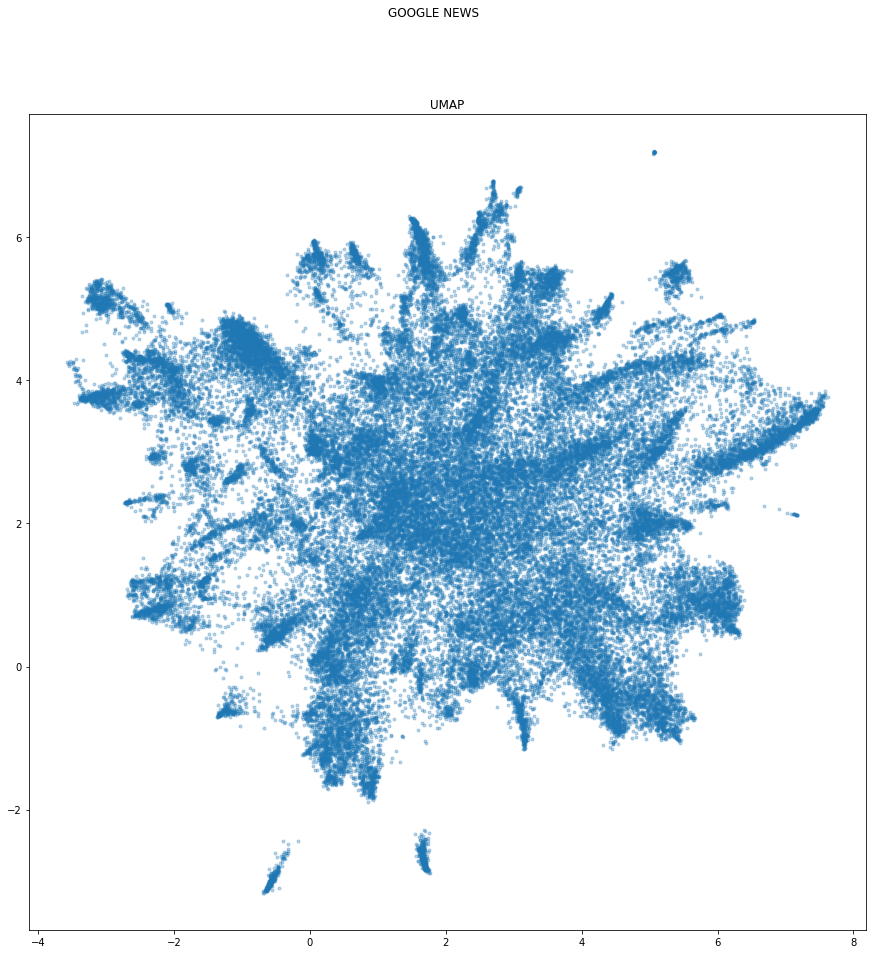

In [16]:
# GOOGLE NEWS
!pip install --upgrade tbb
pyplot.figure(figsize=(16, 9))

#UMAP

fig, ax = pyplot.subplots()
x_transformed = algs[0].fit_transform(googlenews_data)
print(x_transformed)
visual_data(fig, type(algs[0]).__name__, x_transformed, ax)
fig.suptitle('GOOGLE NEWS')

pyplot.show()


**t-SNE**

In [ ]:
#t-SNE

fig, ax = pyplot.subplots()
x_transformed = algs[1].fit_transform(googlenews_data)
visual_data(fig, type(algs[1]).__name__, x_transformed, ax)
fig.suptitle('GOOGLE NEWS')
pyplot.show()

**PCA**

In [ ]:
#PCA

fig, ax = pyplotS.subplots()
x_transformed = algs[2].fit_transform(googlenews_data)
visual_data(fig, type(algs[2]).__name__, x_transformed, ax)
pyplot.show()
